<a href="https://colab.research.google.com/github/geetharangaswamaiah/CourseraML/blob/master/Module1/Module1Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1

* Linear Regression with one variable
* Linear Regression with multiple variables


In [0]:
%matplotlib inline
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Read data
def readData(datafile):
  # Read comma separated values from datafile
  cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
  #  The first column is the population of a city and the second column is 
  # the profit of a food truck in that city. A negative value for profit indicates a loss.
  # Assign X and y
  X = np.transpose(np.array(cols[:-1]))
  y = np.transpose(np.array(cols[-1:]))
  # Number of training examples
  m = y.size 
  # Insert intercept term
  X = np.insert(X,0,1,axis=1)
  return X, y

# Read data Multi variables
def readDataMulti(datafile):
  # Read comma separated values from datafile
  cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True)
  # The first column is the size of the house (in square feet), the second column is the 
  # number of bedrooms, and the third column is the price of the house
  # Assign X and y
  X = np.transpose(np.array(cols[:-1]))
  y = np.transpose(np.array(cols[-1:]))
  # Number of training examples
  m = y.size 
  # Insert intercept term
  X = np.insert(X,0,1,axis=1)
  return X, y

# Plot data
def plotData(X, y):
  plt.figure()
  plt.plot(X[:,1],y[:,0],'rx',markersize=10)
  plt.title("Data")
  plt.ylabel('Profit in $10,000s')
  plt.xlabel('Population of City in 10,000s')

# hypothesis function h = X.theta
def hypothesis(theta, X):
  h = np.dot(X, theta)
  return h

# compute cost
def cost(theta, X, y):
  hx = hypothesis(theta, X)
  J = (1 / (2 * m)) * np.dot((hx - y).T, (hx - y))
  return float(J)

# gradient descent
def gradient(theta, X, y, alpha, iterations):
  J_history = []
  for i in range(iterations):
    newTheta = theta
    J = cost(theta, X, y)
    J_history.append(J)
    for j in range(len(newTheta)):
      hx = hypothesis(theta, X)
      newTheta[j] = theta[j] - (alpha / m) * np.sum((hx - y) * np.array(X[:,j]).reshape(m,1))
    theta = newTheta
  return theta, J_history

# Plot convergence of cost
def plotConvergence(J_history):
  plt.figure()
  plt.title("Convergence of Cost function")
  plt.xlabel("Iterations")
  plt.ylabel("Cost function")
  plt.plot(range(len(J_history[1:])), J_history[1:], 'b.', markersize=10)

# Get corresponding fit
def lineFit(theta, X):
  fit = hypothesis(theta, X)
  return fit

# Plot line fit
def plotFit(X, y, fit):
  plt.figure()
  plt.title("Linear Fit")
  plt.ylabel('Profit in $10,000s')
  plt.xlabel("Population of City in 10,000s")
  plt.plot(X[:,1], y[:,0], 'rx', markersize=10)
  plt.plot(X[:,1], fit[:,0], 'b-', markersize=10)

# Plot data range
def plotDataRange(X, X_norm):
  plt.figure(figsize=(16,4))
  plt.subplot(1,2,1)
  plt.title("Feature Range Before Feature Normalization")
  plt.xlabel("Feature value")
  plt.ylabel("Example Number")
  plt.xlim(-200,5000)
  plt.plot(X[:,1], range(np.shape(X)[0]), 'bx', markersize=10)
  plt.plot(X[:,2], range(np.shape(X)[0]), 'rx', markersize=10)
  plt.subplot(1,2,2)
  plt.title("Feature Range After Feature Normalization")
  plt.xlabel("Feature value")
  plt.ylabel("Example Number")
  plt.xlim(-10,10)
  plt.plot(X_norm[:,1], range(np.shape(X_norm)[0]), 'bx', markersize=10)
  plt.plot(X_norm[:,2], range(np.shape(X_norm)[0]), 'rx', markersize=10)

# Feature scaling and Mean normalization
def featureNormalization(X):
  mean = []
  std = []
  # X0 is not required in feature normalization
  X_norm = X.copy()
  for col in range(1, np.shape(X_norm)[1]):
    mean.append(np.mean(X_norm[:,col]))
    std.append(np.std(X_norm[:,col]))
    X_norm[:,col] = (X_norm[:,col] - mean[col-1]) / std[col-1]
  return X_norm, mean, std



LINEAR REGRESSION WITH SINGLE VARIABLE

For population = 35,000, we predict a profit of 4483.985780975752


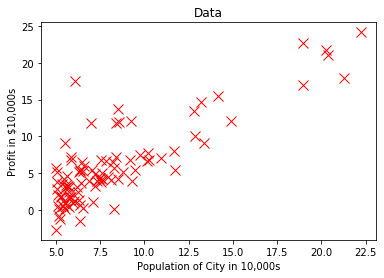

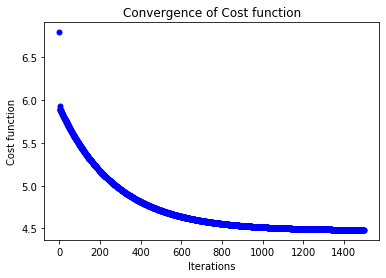

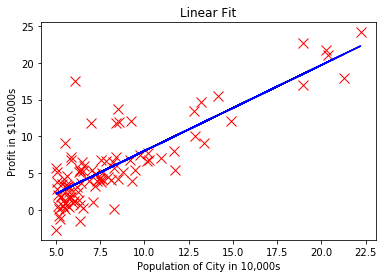

In [199]:
print("\nLINEAR REGRESSION WITH SINGLE VARIABLE\n")
# Reading data
X, y = readData('ex1data1.txt')
m = y.size 
# Plot data
plotData(X, y)
# Setting parameters
iterations = 1500
alpha = 0.01
# Initialize theta
initial_theta = np.zeros((X.shape[1], 1))
# Train model
theta, J_history = gradient(initial_theta, X, y, alpha, iterations)
# Plot convergence of J(theta)
plotConvergence(J_history)
# Get linear fit
myFit = lineFit(theta, X)
# Plot fit
plotFit(X, y, myFit)
# Predict values for population size of 35,000
X1 = np.matrix([[1, 3.5]])
predict1 = hypothesis(theta, X1)
print("For population = 35,000, we predict a profit of", float(predict1*10000));


LINEAR REGRESSION WITH MULTIPLE VARIABLES

For house with size 1650 square feet and 3 bedrooms, we predict a price of 293098.14924753655


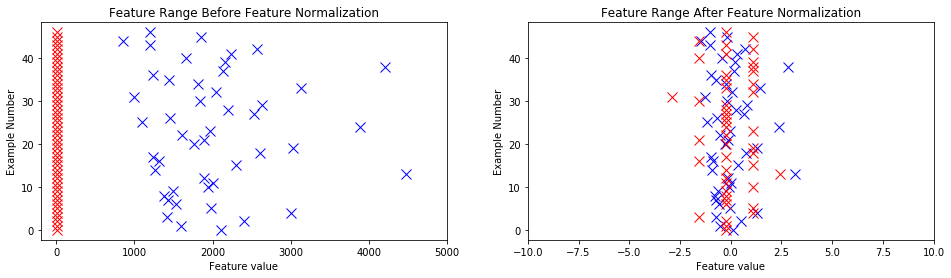

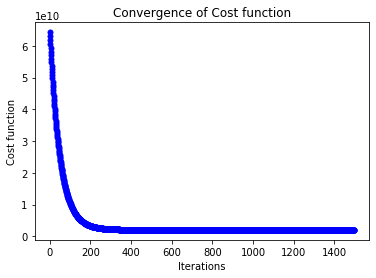

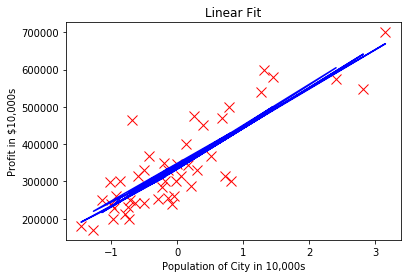

In [200]:
print("\nLINEAR REGRESSION WITH MULTIPLE VARIABLES\n")
# Reading data
X, y = readDataMulti('ex1data2.txt')
m = y.size
# Feature Normalization
X_norm, mean, std = featureNormalization(X)
plotDataRange(X,X_norm) # Plot data before and after feature normalization
# Setting parameters
iterations = 1500
alpha = 0.01
# Initialize theta
initial_theta = np.zeros((X.shape[1], 1))
# Train model
theta, J_history = gradient(initial_theta, X_norm, y, alpha, iterations)
# Plot convergence of J(theta)
plotConvergence(J_history)
# Get linear fit
myFit = lineFit(theta, X_norm)
# Plot fit
plotFit(X_norm, y, myFit)
# predict values for house size 1650 sqrft and 3 bedrooms
X1 = np.matrix([[1,1650,3]])
X1_norm = []
for i in range(np.shape(X1)[1]-1):
  X1_norm.append((X1[:,i+1] - mean[i])/std[i])
X1_norm.insert(0,1)
predict2 = hypothesis(theta, X1_norm)
print("For house with size 1650 square feet and 3 bedrooms, we predict a price of" ,float(predict2))
